In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:, 3:5].values

In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
from sklearn.cluster import Birch
X = np.random.rand(100, 2)
num_clusters_list = []
threshold_range = np.linspace(0.1, 1.0, 10)
for threshold in threshold_range:
    birch_clusterer = Birch(threshold=threshold, n_clusters=None)  # Set n_clusters=None to let BIRCH decide
    birch_clusterer.fit(X)
    num_clusters = len(np.unique(birch_clusterer.labels_))
    num_clusters_list.append(num_clusters)

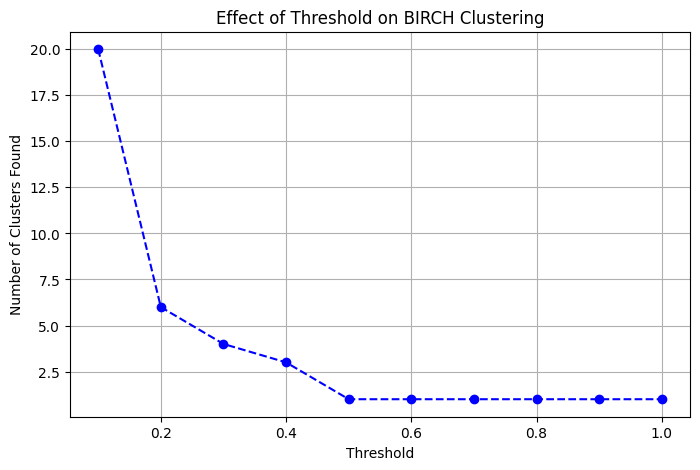

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(threshold_range, num_clusters_list, marker='o', linestyle='--', color='b')
plt.title('Effect of Threshold on BIRCH Clustering')
plt.xlabel('Threshold')
plt.ylabel('Number of Clusters Found')
plt.grid(True)
plt.show()

In [8]:
num_clusters_list

[20, 6, 4, 3, 1, 1, 1, 1, 1, 1]

In [9]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=42)
birch_clusterer = Birch(threshold=0.5, n_clusters=None)  
y_birch = birch_clusterer.fit_predict(X)
print("Cluster labels:\n", y_birch)

Cluster labels:
 [ 0  1  2 21  3  3  4  5  6  3  7  6  0  7  7  7  8  5  9  9 10  7  2 11
 12  8 14  3 11 13  7  9 15  2  8 16 12  6 12 11  7 14  7  9 15 16 13  3
 13 17 12 14 12 16 14  8  9  7 14 18 12 18  3  2 12  3 18 11 12 17 17 12
 14  7 16  3 18  8 19 14 11 16 20 12  5 12  5 17 16  5  7 14 18 16  6  2
 14  4  3 11 12  5 14  7 17  4 15  3  3 21  4  3 11 12  8 21 12 14  8 14
 12 10 13  2 15  4  8 16 18 17  3  3 17  5  2  0  7 10  8  9 18 14 15 18
  4 14 18 12  3  7 14  2  6  5  7 12  2  4  4 16  8 13  4  5  8  3 16 13
  3  4 12 17  7  3  0  9  6 14  8  7 14  7  2 12 12 17  4  4 13  8 17  7
  5  5 11 15  0 17  3 18]


In [10]:
supervised=dataset

In [11]:
supervised['Cluster_group']=y_birch

In [12]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,21
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,15
196,197,Female,45,126,28,0
197,198,Male,32,126,74,17
198,199,Male,32,137,18,3


In [13]:
supervised.to_csv("cluster_BIRCH_Clustering.csv", index=False)

In [14]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,21
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,15
196,197,Female,45,126,28,0
197,198,Male,32,126,74,17
198,199,Male,32,137,18,3


In [15]:
dir(Birch)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_fit',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_get_leaves',
 '_get_param_names',
 '_get_tags',
 '_global_clustering',
 '_more_tags',
 '_parameter_constraints',
 '_predict',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_feature_names_out',
 'get_params',
 'partial_fit',
 'predict',
 'set_output',
 'set_params',
 'transform']

In [16]:
cluster_centers = []
for label in np.unique(y_birch):
    # Find points in the current cluster
    cluster_points = X[y_birch == label]
cluster_center = np.mean(cluster_points, axis=0)
cluster_centers.append(cluster_center)
cluster_centers = np.array(cluster_centers)
print("Cluster Centers:\n", cluster_centers)

Cluster Centers:
 [[-9.8716093   6.81700415]]


In [17]:
y_birch

array([ 0,  1,  2, 21,  3,  3,  4,  5,  6,  3,  7,  6,  0,  7,  7,  7,  8,
        5,  9,  9, 10,  7,  2, 11, 12,  8, 14,  3, 11, 13,  7,  9, 15,  2,
        8, 16, 12,  6, 12, 11,  7, 14,  7,  9, 15, 16, 13,  3, 13, 17, 12,
       14, 12, 16, 14,  8,  9,  7, 14, 18, 12, 18,  3,  2, 12,  3, 18, 11,
       12, 17, 17, 12, 14,  7, 16,  3, 18,  8, 19, 14, 11, 16, 20, 12,  5,
       12,  5, 17, 16,  5,  7, 14, 18, 16,  6,  2, 14,  4,  3, 11, 12,  5,
       14,  7, 17,  4, 15,  3,  3, 21,  4,  3, 11, 12,  8, 21, 12, 14,  8,
       14, 12, 10, 13,  2, 15,  4,  8, 16, 18, 17,  3,  3, 17,  5,  2,  0,
        7, 10,  8,  9, 18, 14, 15, 18,  4, 14, 18, 12,  3,  7, 14,  2,  6,
        5,  7, 12,  2,  4,  4, 16,  8, 13,  4,  5,  8,  3, 16, 13,  3,  4,
       12, 17,  7,  3,  0,  9,  6, 14,  8,  7, 14,  7,  2, 12, 12, 17,  4,
        4, 13,  8, 17,  7,  5,  5, 11, 15,  0, 17,  3, 18])

In [18]:
supervised.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Cluster_group'],
      dtype='object')

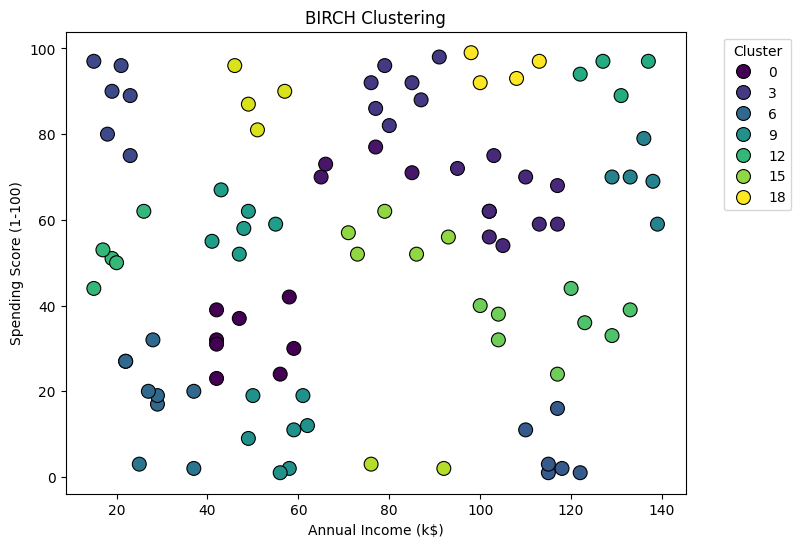

In [19]:
import seaborn as sns
np.random.seed(42)
supervised = pd.DataFrame({
    'CustomerID': np.arange(1, 101),
    'Age': np.random.randint(18, 70, 100),
    'Annual Income (k$)': np.random.randint(15, 140, 100),
    'Spending Score (1-100)': np.random.randint(1, 100, 100),
})
x_col = 'Annual Income (k$)'
y_col = 'Spending Score (1-100)'
birch_clusterer = Birch(threshold=10, n_clusters=None)  
supervised['Cluster'] = birch_clusterer.fit_predict(supervised[[x_col, y_col]])
plt.figure(figsize=(8, 6))
sns.scatterplot(data=supervised, x=x_col, y=y_col, hue='Cluster', palette="viridis", s=100, edgecolor='k')
plt.title('BIRCH Clustering')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.legend(title='Cluster', loc='best', bbox_to_anchor=(1.05, 1))
plt.show()